Introduction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
covid = pd.read_csv('ncbi_datasets.csv',low_memory = False)
covid.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847791 entries, 0 to 847790
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nucleotide Accession  847791 non-null  object 
 1   Species Taxonomy Id   847791 non-null  int64  
 2   Species Name          847791 non-null  object 
 3   Virus Genus           847791 non-null  object 
 4   Virus Family          847791 non-null  object 
 5   Isolate Name          609653 non-null  object 
 6   Nucleotide Length     847791 non-null  int64  
 7   Sequence Type         847791 non-null  object 
 8   Nuc Completeness      847791 non-null  object 
 9   Geo Location          847720 non-null  object 
 10  US State              0 non-null       float64
 11  Host Name             0 non-null       float64
 12  Host Taxonomy ID      847791 non-null  int64  
 13  Collection Date       847595 non-null  object 
 14  BioProject            611783 non-null  object 
 15  

In [7]:
covid['Collection Date'] = pd.to_datetime(covid['Collection Date'])

When was the first sample from each of the continents found?

In [13]:
def return_continent(val):
    lst = str(val).split(';')
    return lst[0]
covid['continent'] = covid['Geo Location'].apply(lambda x: return_continent(x))
continent_dates = covid.groupby('continent')['Collection Date'].min()
continent_dates

continent
Africa          2020-02-06
Asia            2019-12-01
Europe          2020-01-01
North America   2020-01-01
Oceania         2020-01-01
South America   2020-01-01
nan             2020-01-20
Name: Collection Date, dtype: datetime64[ns]

How many sequences on each continent?

In [10]:
num_unique = covid.groupby('continent')['Sequence Type'].nunique()

In [11]:
num_cases = covid.groupby('continent')['Virus Genus'].count()

In [12]:
num_cases

continent
Africa             2192
Asia               8581
Europe           254520
North America    571069
Oceania           10603
South America       755
nan                  71
Name: Virus Genus, dtype: int64

<AxesSubplot:xlabel='continent'>

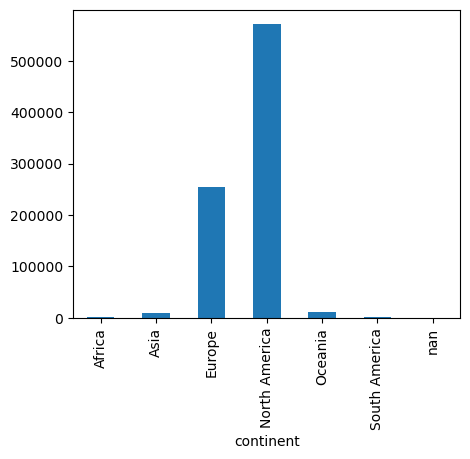

In [25]:
plt.figure(figsize = (5,4))
num_cases.plot.bar()

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.4779e+05]),
 array([ 2859. ,  5574.9,  8290.8, 11006.7, 13722.6, 16438.5, 19154.4,
        21870.3, 24586.2, 27302.1, 30018. ]),
 <BarContainer object of 10 artists>)

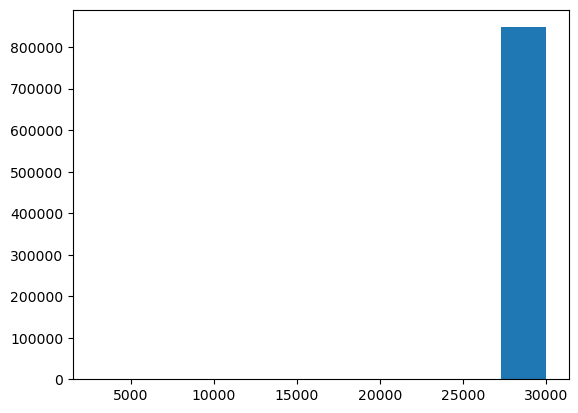

In [26]:
plt.hist(covid['Nucleotide Length'])

Remove outliers

Remove outliers using inter quartile ranges

In [27]:
covid['Nucleotide Length'].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: Nucleotide Length, dtype: float64

In [28]:
q1 = covid['Nucleotide Length'].describe()[4]
q3 = covid['Nucleotide Length'].describe()[6]
iqr = q3-q1
lower_bound = q1-iqr
upper_bound = q3+iqr

In [29]:
length_without_outliers = covid[covid['Nucleotide Length'].between(lower_bound,upper_bound)]

In [30]:
len(length_without_outliers)/len(covid['Nucleotide Length'])

0.9703275925316499

3% of the data are defined as outliers, lets remove them

In [31]:
covid = covid[covid['Nucleotide Length'].between(lower_bound,upper_bound)]

(array([1.70620e+04, 1.99900e+04, 6.62420e+04, 1.34273e+05, 1.68514e+05,
        6.17720e+04, 6.59090e+04, 2.04770e+05, 8.40910e+04, 1.20000e+01]),
 array([29688. , 29714.7, 29741.4, 29768.1, 29794.8, 29821.5, 29848.2,
        29874.9, 29901.6, 29928.3, 29955. ]),
 <BarContainer object of 10 artists>)

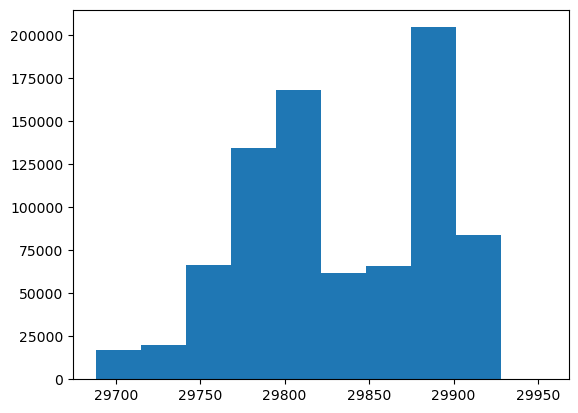

In [32]:
plt.hist(covid['Nucleotide Length'])

Samples collected by month

<AxesSubplot:xlabel='Collection Date'>

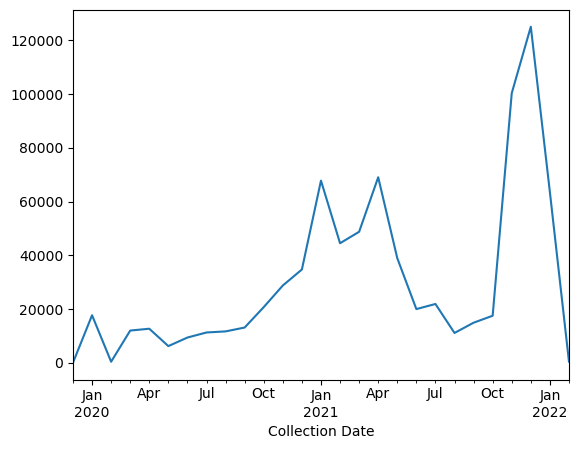

In [35]:
monthly_cases = covid.groupby(covid['Collection Date'].dt.to_period('M'))['Species Name'].count()
monthly_cases.plot()

Group by continent and monthly cases. (Figure out how to plot)

In [75]:
continent_over_time = covid.groupby(['continent',covid['Collection Date'].dt.to_period('M')]).size()

Lets sequence the first covid sequence (REfSeq), first sequence for north america,Delta and omicron

First, lets do the reference sequence

In [80]:
first_seq = covid[covid['Sequence Type'] == 'RefSeq']
first_seq

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


And first in north america

In [92]:
north_america_df = covid[(covid['continent'] == 'North America')].sort_values('Collection Date')
north_america_df.head(1)

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,continent
560542,OL676391.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCov_19_USA_ID_IVREF_6779...,29829,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America


In [76]:
delta = covid[covid['Isolate Name'].str.contains('Delta').fillna(False)]
delta

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [78]:
omicron = covid[covid['Isolate Name'].str.contains('Omicron').fillna(False)]
omicron

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [93]:
nucleotide_ids = ['NC_045512.2','OL676391.1','OM108163.1','OM095411.1']
human_names = ['first_sequenced','first_north_america','Delta','Omicron']

In [94]:
selected_sequences = covid[covid['Nucleotide Accession'].isin(nucleotide_ids)]
selected_sequences

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
560542,OL676391.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCov_19_USA_ID_IVREF_6779...,29829,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


Download sequences

In [96]:
from Bio import Entrez

In [97]:
Entrez.email = "markus101.svensson@gmail.com"
